### Regression

### Big Mart Sales Prediction Problem

#### Problem Statement

#### Sales Prediction for Big Mart Outlets
- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also,    certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

- Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

#### Dataset Collection

Collected data from https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement<br>

#### About Dataset

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). <br>
Train file: CSV containing the item outlet information with sales value <br>
Test file: CSV containing item outlet combinations for which sales need to be forecasted <br>

#### About Target

We need to predict the sales for test data set.

#### Suitable Metric based on the problem and target

Model performance will be evaluated on the basis of our prediction of the sales for the test data (test.csv), <br>
which contains similar data-points as train except for the sales to be predicted.<br>
We at our end, have the actual sales for the test dataset, against which our predictions will be evaluated. <br>
We will use the Root Mean Square Error value to judge your response.


#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading data

In [260]:
train_data = pd.read_csv("Data/train_bm.csv")
test_data = pd.read_csv("Data/test_bm.csv")

In [261]:
data=pd.concat([train_data,test_data],ignore_index=True)

In [262]:
train_data.shape

(8523, 12)

In [263]:
test_data.shape

(5681, 11)

In [264]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [265]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [266]:
data.shape

(14204, 12)

#### Statistical Analysis

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [268]:
data.describe().columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [269]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [270]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


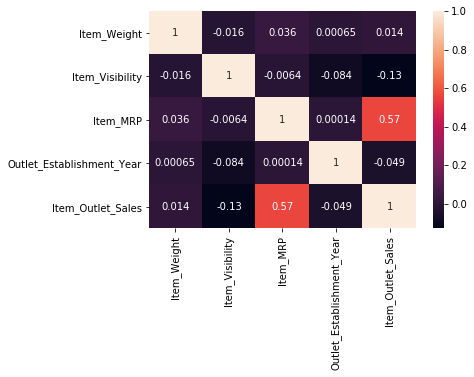

In [271]:
sns.heatmap(data.corr(),annot=True)

we have missing values in train and test data

In [272]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [273]:
data.dtypes.index

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [274]:
data.Outlet_Size.isnull().sum()

4016

In [275]:
data.Item_Weight.isnull().sum()

2439

In [276]:
data.Item_Weight.value_counts()

17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
5.210       7
7.960       7
4.615       6
9.035       6
7.850       6
Name: Item_Weight, Length: 415, dtype: int64

In [277]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [278]:
data.Outlet_Size.mode()[0]

'Medium'

#### Exploratory Data Analysis

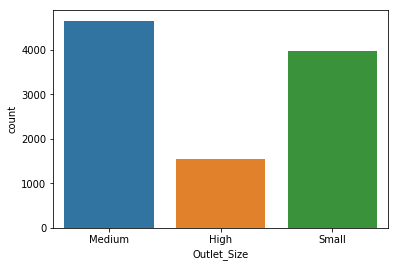

In [279]:
sns.countplot(data.Outlet_Size)

(array([290., 240., 168., 130.,  57.,  62.,  25.,  15.,   9.,   4.]),
 array([  33.29   ,  957.55356, 1881.81712, 2806.08068, 3730.34424,
        4654.6078 , 5578.87136, 6503.13492, 7427.39848, 8351.66204,
        9275.9256 ]),
 <a list of 10 Patch objects>)

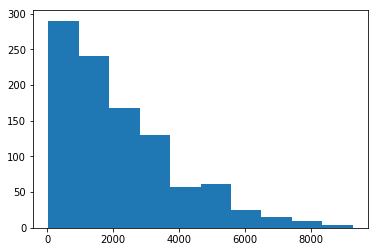

In [280]:
x = data['Item_Outlet_Sales'].head(1000)
plt.hist(x)

In [281]:
train_data['Item_Identifier'].nunique()

1559

<BarContainer object of 24 artists>

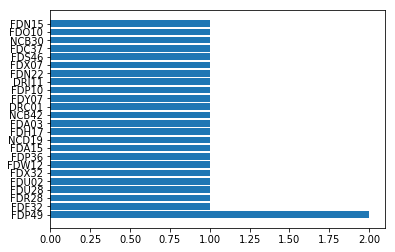

In [282]:
x = data['Item_Identifier'].head(25)
plt.barh(x.value_counts().index,x.value_counts())

In [283]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

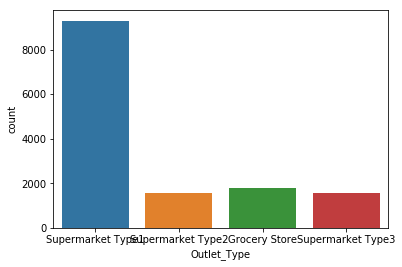

In [284]:
sns.countplot(data.Outlet_Type)

In [285]:
data.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

<BarContainer object of 10 artists>

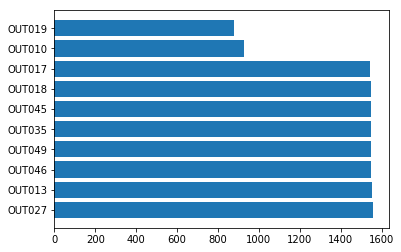

In [286]:
plt.barh(data.Outlet_Identifier.value_counts().index,data.Outlet_Identifier.value_counts())

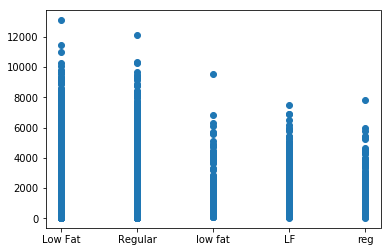

In [287]:
plt.scatter(x='Item_Fat_Content', y='Item_Outlet_Sales',data=data)

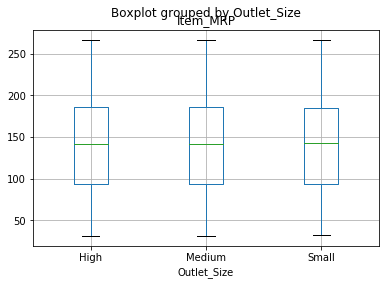

In [288]:
data.boxplot(column='Item_MRP', by='Outlet_Size')

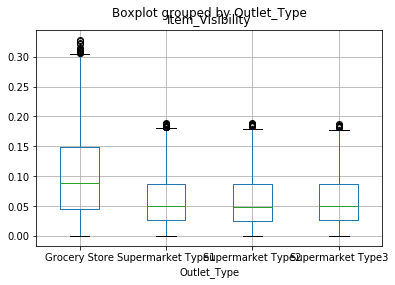

In [289]:
#plt.figure(figsize=(12,9))
data.boxplot(column='Item_Visibility', by='Outlet_Type')

In [290]:
data.dtypes[data.dtypes.index]=='object'

Item_Identifier               True
Item_Weight                  False
Item_Fat_Content              True
Item_Visibility              False
Item_Type                     True
Item_MRP                     False
Outlet_Identifier             True
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type          True
Outlet_Type                   True
Item_Outlet_Sales            False
dtype: bool

In [291]:
cat_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
cat_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

#### Preprocessing
- Outlier removal
- Imputation
- Scaling


In [292]:
Q1 = data.quantile(0.25)
Q1

Item_Weight                     8.710000
Item_Visibility                 0.027036
Item_MRP                       94.012000
Outlet_Establishment_Year    1987.000000
Item_Outlet_Sales             834.247400
Name: 0.25, dtype: float64

In [293]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [294]:
print(IQR)

Item_Weight                     8.040000
Item_Visibility                 0.067002
Item_MRP                       91.843600
Outlet_Establishment_Year      17.000000
Item_Outlet_Sales            2267.049000
dtype: float64


In [295]:
Q1 - 1.5 * IQR

Item_Weight                    -3.350000
Item_Visibility                -0.073467
Item_MRP                      -43.753400
Outlet_Establishment_Year    1961.500000
Item_Outlet_Sales           -2566.326100
dtype: float64

In [296]:
Q3 + 1.5 * IQR

Item_Weight                    28.81000
Item_Visibility                 0.19454
Item_MRP                      323.62100
Outlet_Establishment_Year    2029.50000
Item_Outlet_Sales            6501.86990
dtype: float64

In [297]:
print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

       Item_Fat_Content  Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0                 False            False     False              False   
1                 False            False     False              False   
2                 False            False     False              False   
3                 False            False     False              False   
4                 False            False     False              False   
...                 ...              ...       ...                ...   
14199             False            False     False              False   
14200             False            False     False              False   
14201             False            False     False              False   
14202             False            False     False              False   
14203             False            False     False              False   

       Item_Type  Item_Visibility  Item_Weight  Outlet_Establishment_Year  \
0          False            False        False

In [298]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(13757, 12)

In [299]:
data_out["Item_Weight"].isnull().sum()

2202

In [300]:
data_out["Item_Weight"] = data_out["Item_Weight"].fillna(data_out["Item_Weight"].mean())

C:\Users\Anil Arella\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [301]:
data_out["Outlet_Size"] = data_out["Outlet_Size"].fillna(data_out["Outlet_Size"].mode()[0])

C:\Users\Anil Arella\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [302]:
data_out.Item_Fat_Content.value_counts()

Low Fat    8234
Regular    4659
LF          503
reg         189
low fat     172
Name: Item_Fat_Content, dtype: int64

In [303]:
data_out.Item_Fat_Content=data_out.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data_out.Item_Fat_Content.value_counts()

C:\Users\Anil Arella\Anaconda3\lib\site-packages\pandas\core\generic.py:5302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Low Fat    8909
Regular    4848
Name: Item_Fat_Content, dtype: int64

In [304]:
data_out['Item_Type'].value_counts()

Fruits and Vegetables    1940
Snack Foods              1921
Household                1508
Frozen Foods             1378
Dairy                    1095
Baking Goods             1055
Canned                   1049
Health and Hygiene        839
Meat                      717
Soft Drinks               706
Breads                    402
Hard Drinks               352
Others                    276
Starchy Foods             258
Breakfast                 176
Seafood                    85
Name: Item_Type, dtype: int64

In [305]:
data_out.Item_Type.nunique()

16

In [306]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_out['Outlet'] = le.fit_transform(data_out['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    data_out[i] = le.fit_transform(data_out[i])

C:\Users\Anil Arella\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anil Arella\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [307]:
data_out['Item'] = le.fit_transform(data_out['Item_Identifier'])

C:\Users\Anil Arella\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [308]:
data_out = pd.get_dummies(data_out, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type'])

In [309]:
#IDcol=['Item_Identifier','Outlet_Identifier']

In [310]:
data_out.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],inplace=True,axis=1)

In [311]:
data_out['Item_Outlet_Sales'][:8523].isnull().sum()

334

In [312]:
8523-334

8189

In [313]:
data_out['Item_Outlet_Sales'][:8189].isnull().sum()

0

In [314]:
train=data_out.iloc[:8189,:]
test=data_out.iloc[8189:,:]

In [315]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet,Item,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
Item_Weight,1.000000,-0.008210,0.026390,0.010945,-0.010785,0.045013,0.022325,-0.022325,0.002958,-0.014364,...,0.029036,-0.046337,0.016475,0.035350,-0.004231,0.026291,-0.005195,0.011259,-0.046377,0.025351
Item_Visibility,-0.008210,1.000000,0.001582,-0.070335,-0.053735,-0.023713,-0.049481,0.049481,0.028579,-0.032083,...,0.018958,-0.003651,-0.053579,-0.033533,-0.019064,-0.017003,0.006775,0.007575,-0.010793,-0.001266
Item_MRP,0.026390,0.001582,1.000000,0.564568,0.001016,0.012153,-0.009750,0.009750,0.006826,0.006366,...,0.021750,-0.009045,-0.043104,0.047726,-0.002664,-0.013385,0.000870,0.035274,-0.039502,0.013603
Item_Outlet_Sales,0.010945,-0.070335,0.564568,1.000000,0.166110,-0.000066,-0.026503,0.026503,-0.087847,0.071743,...,0.022615,-0.002186,-0.027227,0.016930,-0.002649,-0.012684,0.015685,0.025487,-0.032630,0.018473
Outlet,-0.010785,-0.053735,0.001016,0.166110,1.000000,-0.010629,-0.004368,0.004368,0.624195,0.061600,...,0.003070,0.009474,-0.017140,-0.005269,-0.006289,0.005180,0.007601,0.008505,-0.003944,-0.000114
Item,0.045013,-0.023713,0.012153,-0.000066,-0.010629,1.000000,0.116888,-0.116888,0.005683,-0.015143,...,-0.079130,-0.240700,0.375418,0.473383,0.014934,0.199915,-0.058800,-0.035788,-0.375573,-0.128891
Item_Fat_Content_0,0.022325,-0.049481,-0.009750,-0.026503,-0.004368,0.116888,1.000000,-1.000000,-0.004478,0.003968,...,-0.116092,0.118737,0.189219,0.255350,-0.118490,0.106057,-0.008601,-0.066107,0.096185,-0.023843
Item_Fat_Content_1,-0.022325,0.049481,0.009750,0.026503,0.004368,-0.116888,-1.000000,1.000000,0.004478,-0.003968,...,0.116092,-0.118737,-0.189219,-0.255350,0.118490,-0.106057,0.008601,0.066107,-0.096185,0.023843
Outlet_Location_Type_0,0.002958,0.028579,0.006826,-0.087847,0.624195,0.005683,-0.004478,0.004478,1.000000,-0.441807,...,-0.004221,-0.001492,-0.009536,-0.002763,0.005841,0.014674,-0.002461,-0.002572,-0.005667,-0.010224
Outlet_Location_Type_1,-0.014364,-0.032083,0.006366,0.071743,0.061600,-0.015143,0.003968,-0.003968,-0.441807,1.000000,...,-0.001692,0.002825,-0.004693,-0.000458,-0.014136,-0.006543,0.005817,0.005261,0.012489,0.008963


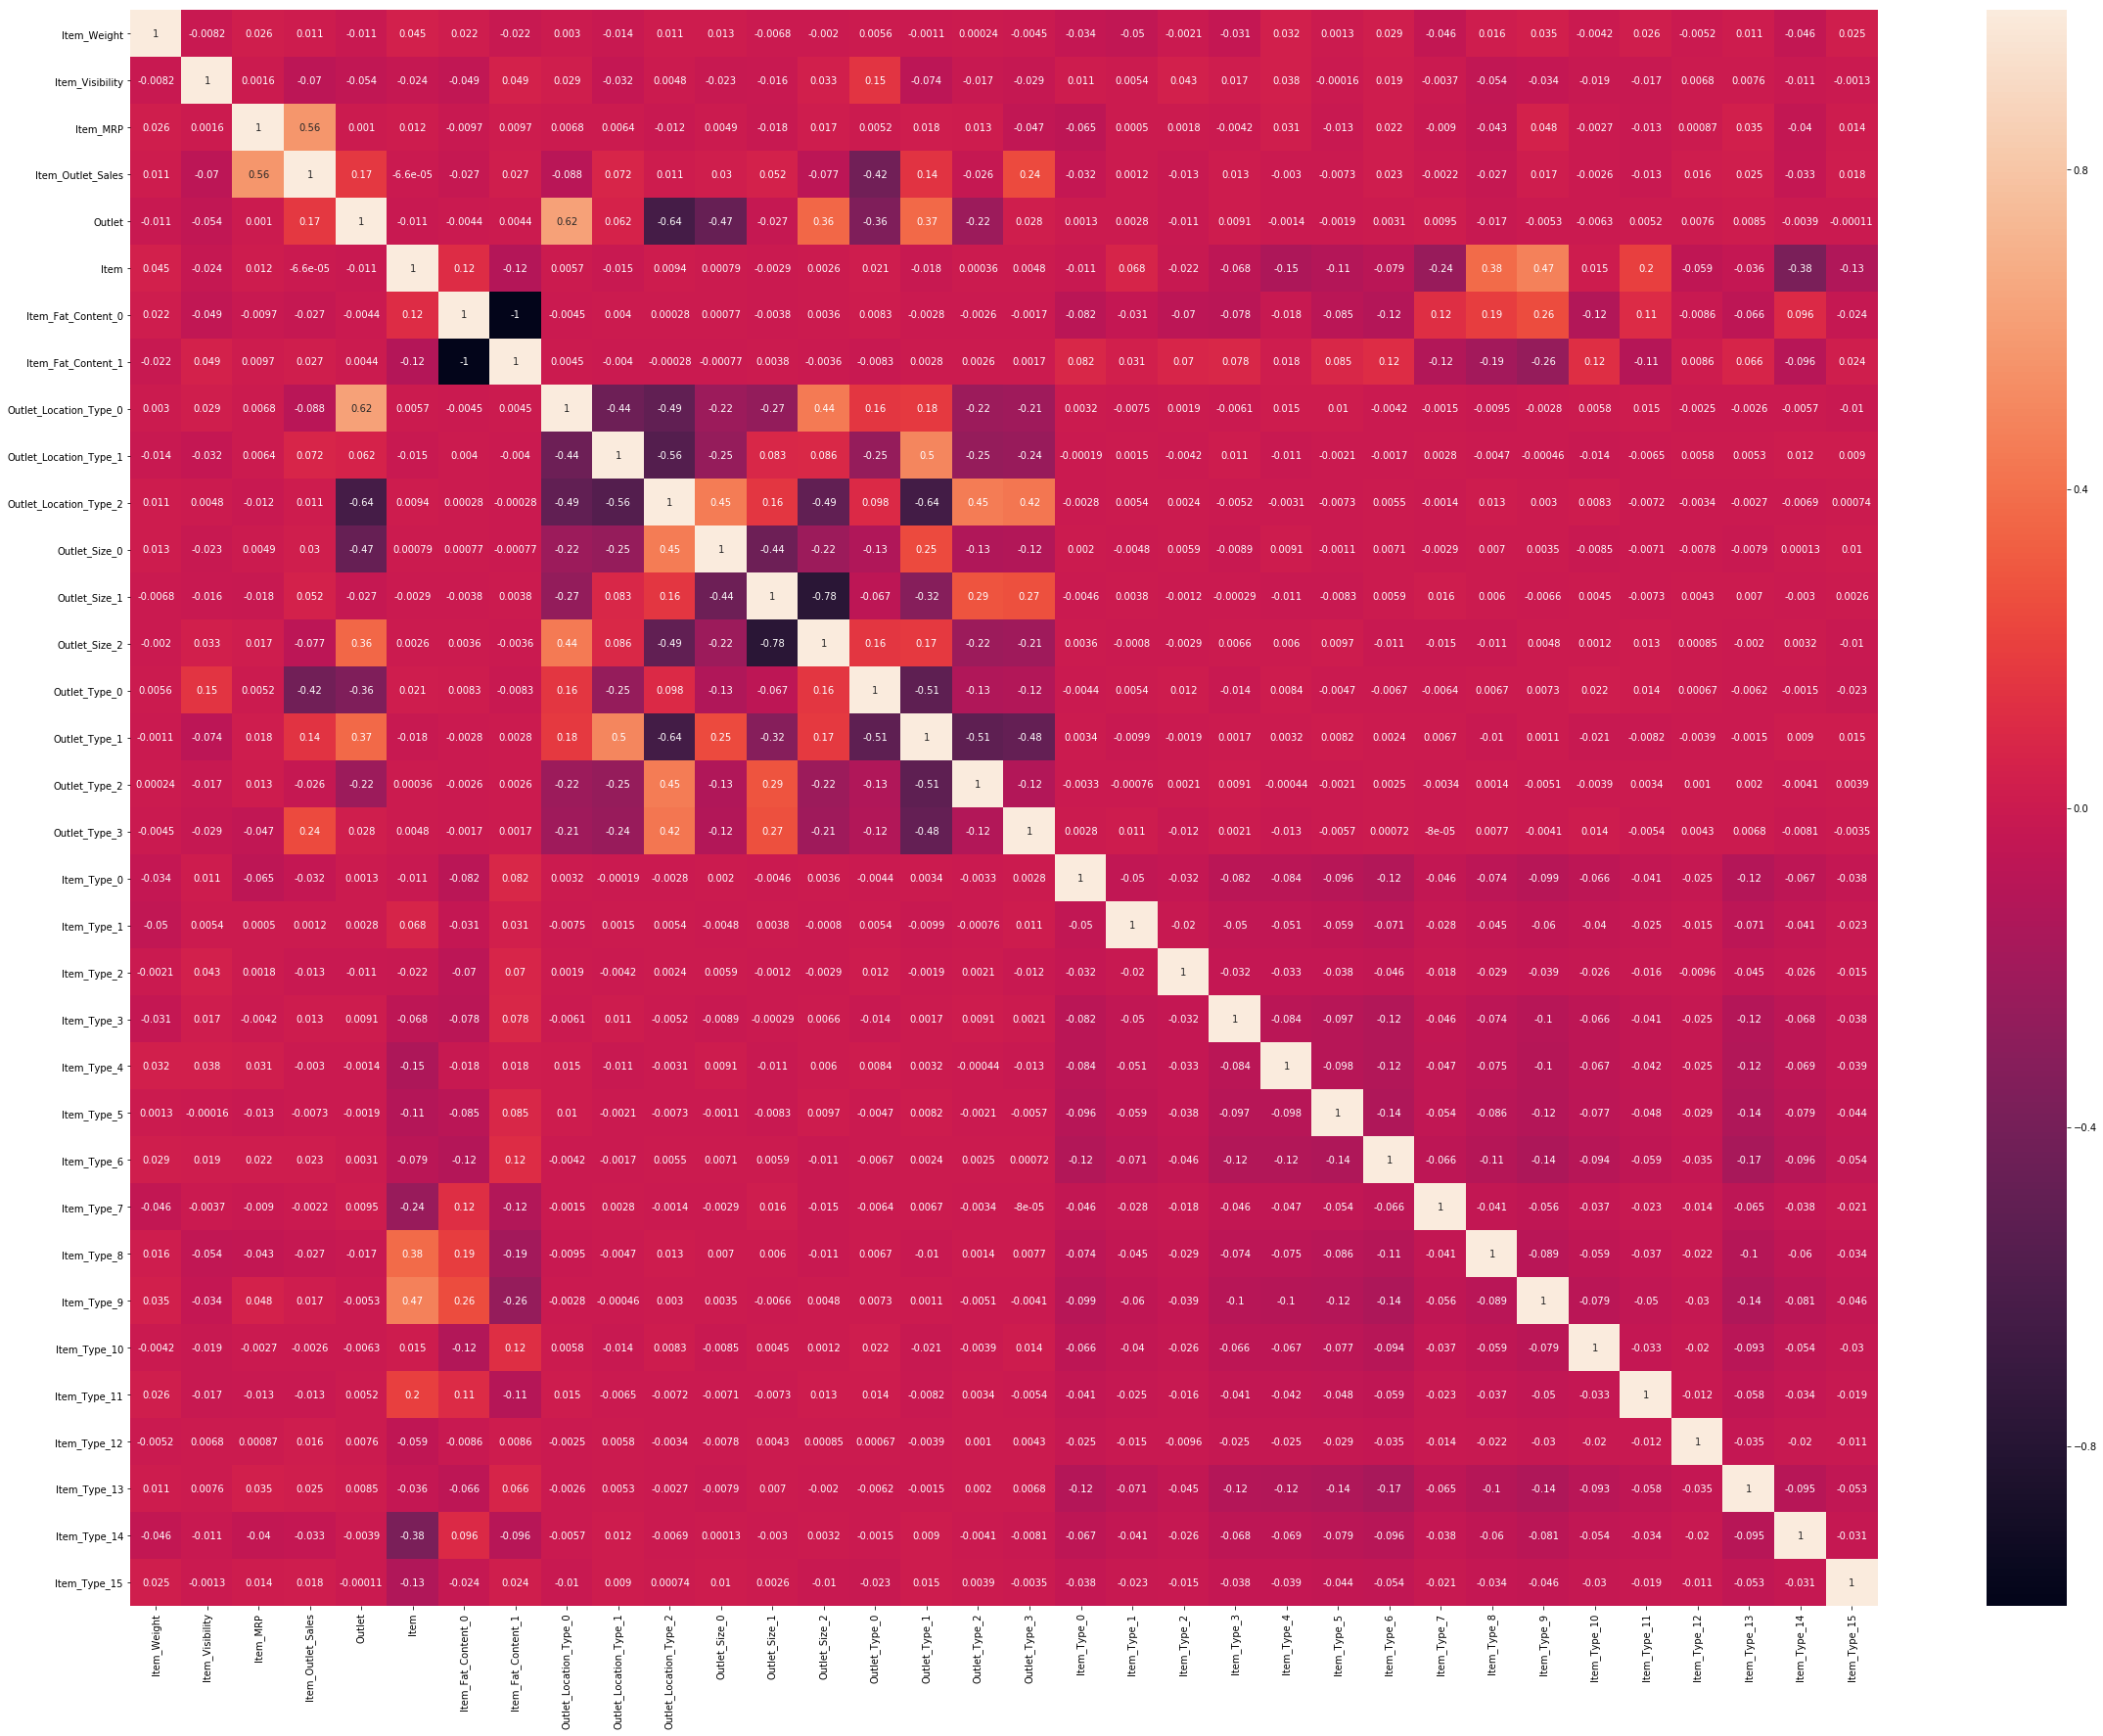

In [316]:
plt.figure(figsize=(40,30))
sns.heatmap(train.corr(),annot=True)

In [317]:
#Splitting train data into train and test
y = train['Item_Outlet_Sales']

In [318]:
train.drop('Item_Outlet_Sales',inplace=True,axis=1)

C:\Users\Anil Arella\Anaconda3\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [319]:
#test.drop('Item_Outlet_Sales',inplace=True,axis=1)

In [320]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet,Item,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,9.30,0.016047,249.8092,9,156,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,3,8,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,9,662,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,0,1121,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1,1297,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [321]:
train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet', 'Item',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Item_Type_15'],
      dtype='object')

In [322]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

#### Standardization

In [323]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_std = sc.fit_transform(train)

In [324]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_std,y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6551, 33) (1638, 33) (6551,) (1638,)


#### Building models on the data

In [325]:
#Liner Regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [326]:
y_pred = model1.predict(x_test)

In [327]:
y_pred

array([3494.52591114, 3955.02591114, 2845.02591114, ..., 2663.02591114,
       3527.02591114, 2721.02591114])

In [328]:
predicted = pd.DataFrame({'pred':y_pred,'actual':y_test})
predicted

,pred,actual
5343,3494.525911,3215.8140
8472,3955.025911,1653.8472
7135,2845.025911,5688.5952
8462,1460.025911,1494.0552
2119,-164.974089,102.5332
...,...,...
45,715.025911,358.2004
6806,3966.025911,3570.0196
4328,2663.025911,5690.5926
6120,3527.025911,1813.6392


In [174]:
columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet', 'Item','Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0','Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1','Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5','Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13','Item_Type_14', 'Item_Type_15']

In [194]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

1029.1377711749155

In [195]:
from sklearn.metrics import r2_score, accuracy_score
print("R2-Score",r2_score(y_pred, y_test))

R2-Score 0.10636479332763582


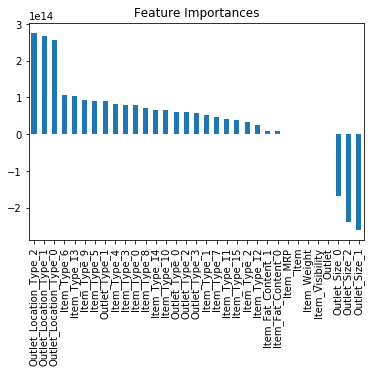

In [176]:
coef1 = pd.Series(model1.coef_, columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

In [177]:
#Ridge Regression Model
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=0.05)
model2.fit(x_train,y_train)
np.sqrt(mean_squared_error(model2.predict(x_test),y_test))

1029.1577918337498

In [192]:
r2_score(model2.predict(x_test),y_test)

0.10619981774575904

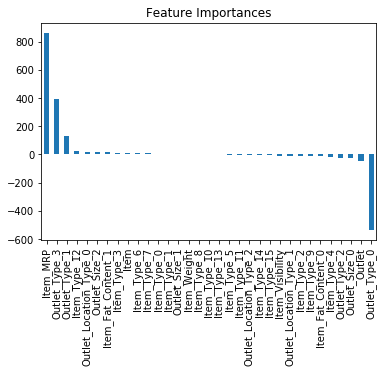

In [178]:
coef2 = pd.Series(model2.coef_, columns).sort_values(ascending=False)
coef2.plot(kind='bar', title='Feature Importances')

In [179]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model3.fit(x_train,y_train)
np.sqrt(mean_squared_error(model3.predict(x_test),y_test))

1001.8887373513597

In [196]:
print("R2-Score",r2_score(model3.predict(x_test), y_test))

R2-Score 0.25213331368585423


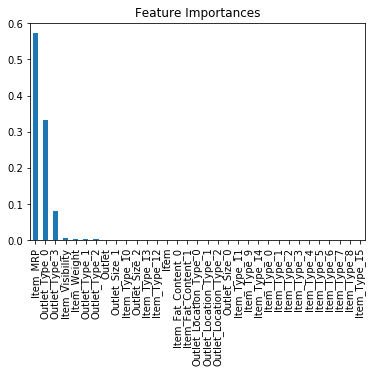

In [180]:
coef3 = pd.Series(model3.feature_importances_, columns).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

In [181]:
model3_1 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
model3_1.fit(x_train,y_train)
np.sqrt(mean_squared_error(model3_1.predict(x_test),y_test))

1003.5894862876733

In [198]:
r2_score(model3_1.predict(x_test),y_test)

0.2377407153719947

In [82]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
model4.fit(x_train,y_train)
np.sqrt(mean_squared_error(model4.predict(x_test),y_test))

NameError: name 'x_train' is not defined

In [199]:
r2_score(model4.predict(x_test),y_test)

0.2280056945916793

In [185]:
mean_squared_error(model4.predict(x_test),y_test)

987304.503449447

In [81]:
model5 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
model5.fit(x_train,y_train)
np.sqrt(mean_squared_error(model5.predict(x_test),y_test))

NameError: name 'RandomForestRegressor' is not defined

In [200]:
r2_score(model3.predict(x_test),y_test)

0.25213331368585423

In [77]:
coef5 = pd.Series(model5.feature_importances_, columns)

NameError: name 'model5' is not defined

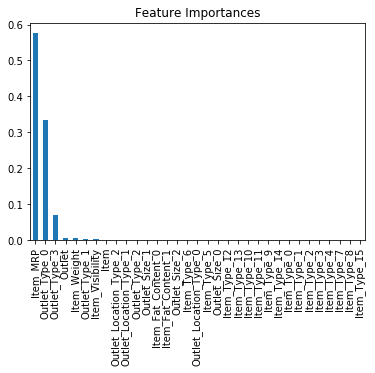

In [184]:
coef5 = pd.Series(model5.feature_importances_, columns).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

### Classification

#### Problem Statement

#### About Dataset

#### Suitable Metric based on the problem and target

#### Reading Data

In [338]:
bank_data = pd.read_csv("Data/bank.csv",sep=";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [339]:
bank_data.y.value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

In [340]:
bank_data.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [341]:
bank_data.shape

(4521, 17)

In [342]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


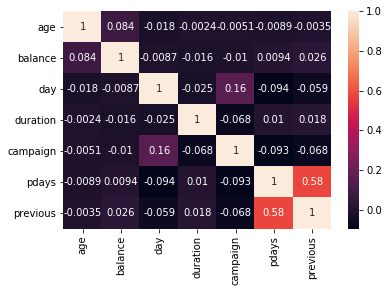

In [343]:
sns.heatmap(bank_data.corr(),annot=True)

In [344]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [345]:
num_cols = bank_data.select_dtypes(exclude=object).columns

In [346]:
cat_cols = bank_data.select_dtypes(include=object).columns

In [347]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

TypeError: cannot perform reduce with flexible type

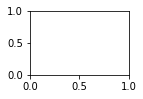

In [348]:
for i in range(len(cat_cols)):
    plt.subplot(3,3,i+1)
    plt.boxplot(bank_data[cat_cols[i]])

In [349]:
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

IndexError: index 7 is out of bounds for axis 0 with size 7

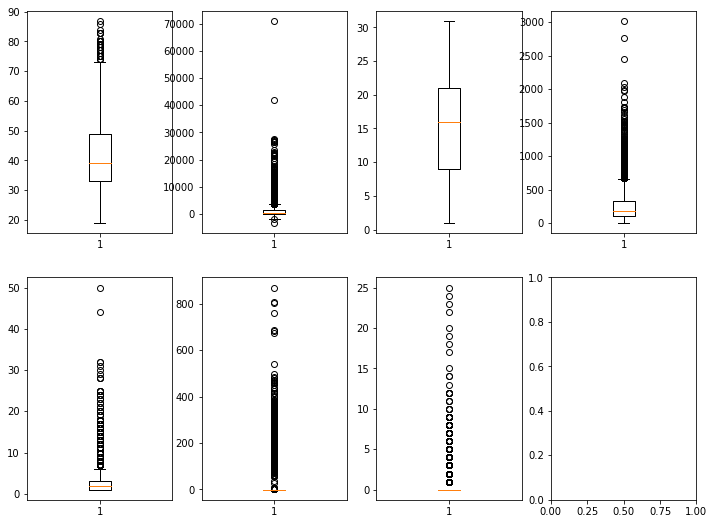

In [350]:
plt.figure(figsize=(12,9))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.boxplot(bank_data[num_cols[i]])

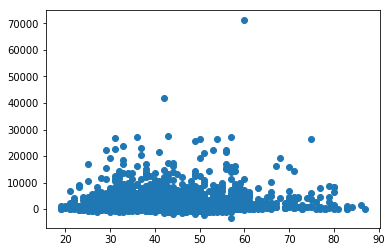

In [351]:
plt.scatter(x='age',y='balance',data=bank_data)

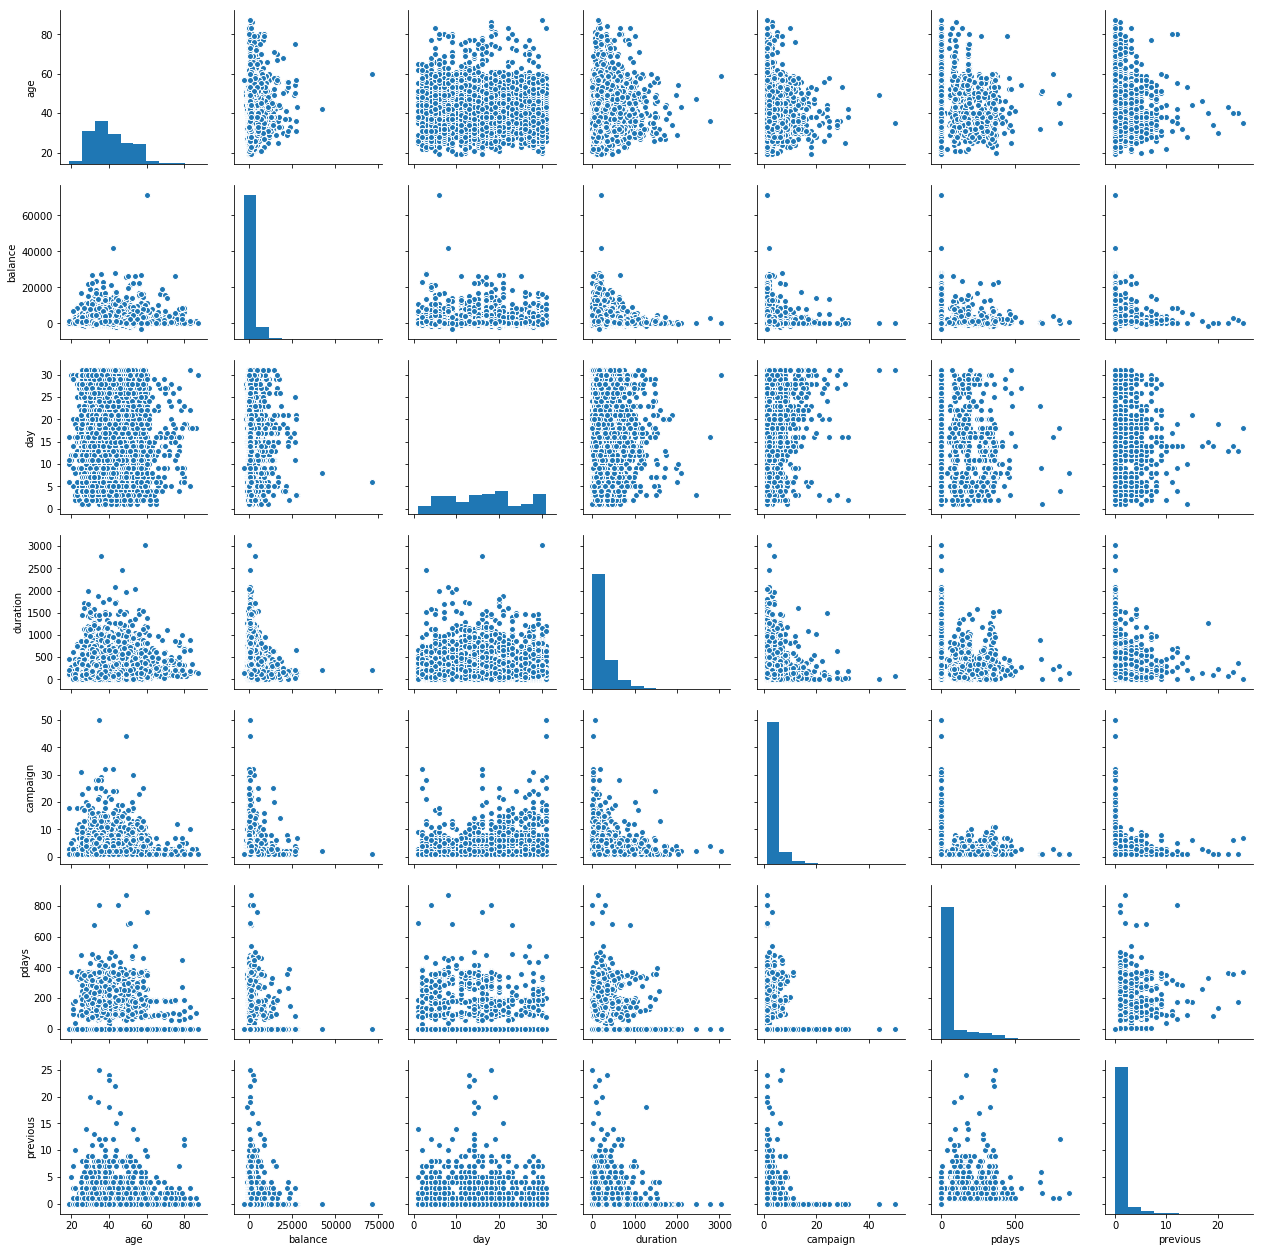

In [352]:
sns.pairplot(bank_data[num_cols])

In [353]:
Q1 = bank_data.quantile(0.25)
Q3 = bank_data.quantile(0.75)
IQR = Q3 - Q1

In [354]:
Q1

age          33.0
balance      69.0
day           9.0
duration    104.0
campaign      1.0
pdays        -1.0
previous      0.0
Name: 0.25, dtype: float64

In [355]:
Q3

age           49.0
balance     1480.0
day           21.0
duration     329.0
campaign       3.0
pdays         -1.0
previous       0.0
Name: 0.75, dtype: float64

In [356]:
print(IQR)

age           16.0
balance     1411.0
day           12.0
duration     225.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [357]:
Q1 - 1.5 * IQR

age            9.0
balance    -2047.5
day           -9.0
duration    -233.5
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64

In [358]:
Q3 + 1.5 * IQR

age           73.0
balance     3596.5
day           39.0
duration     666.5
campaign       6.0
pdays         -1.0
previous       0.0
dtype: float64

In [359]:
b = ((bank_data < (Q1 - 1.5 * IQR)) | (bank_data > (Q3 + 1.5 * IQR)))

In [360]:
b.y.value_counts()

False    4521
Name: y, dtype: int64

In [361]:
b.previous.value_counts()

False    3705
True      816
Name: previous, dtype: int64

In [362]:
bank_data.shape

(4521, 17)

In [363]:
data = bank_data.copy()

In [364]:
data.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [365]:
Q1

age          33.0
balance      69.0
day           9.0
duration    104.0
campaign      1.0
pdays        -1.0
previous      0.0
Name: 0.25, dtype: float64

In [366]:
Q3

age           49.0
balance     1480.0
day           21.0
duration     329.0
campaign       3.0
pdays         -1.0
previous       0.0
Name: 0.75, dtype: float64

In [367]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [368]:
data_out.shape

(2803, 17)

In [369]:
data_out.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [370]:
data_out.y.value_counts()

no     2638
yes     165
Name: y, dtype: int64

In [371]:
data_out.loc[data_out.y==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [372]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [373]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in range(len(cat_cols)):
    bank_data[cat_cols[i]] = lb.fit_transform(bank_data[cat_cols[i]])

In [374]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [375]:
bank_data.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [376]:
X = bank_data.drop('y',axis=1)
Y = bank_data['y']

In [377]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [378]:
X_std[1]

array([-0.77258281,  0.79524562, -0.24642938, -0.30903792, -0.1307588 ,
        1.1186443 ,  0.87561735,  2.3542922 , -0.72364152, -0.59602646,
        0.81928751, -0.16919389, -0.57682947,  2.98904408,  2.04173372,
       -2.57996071])

In [379]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_std,Y,test_size=0.3)

In [380]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3164, 16) (1357, 16) (3164,) (1357,)


In [381]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [382]:
d = {}
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    d[i] = accuracy_score(knn.predict(x_test),y_test)

In [383]:
d

{1: 0.8673544583640383,
 2: 0.887988209285188,
 3: 0.8857774502579219,
 4: 0.8865143699336773,
 5: 0.8850405305821666,
 6: 0.8843036109064112,
 7: 0.887988209285188,
 8: 0.8828297715549005,
 9: 0.8806190125276345}

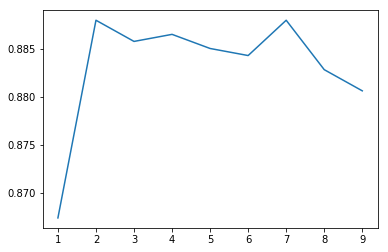

In [384]:
plt.plot(d.keys(),d.values())

In [385]:
y_pred = knn.predict(x_test)

In [386]:
model_predicted = pd.DataFrame({'Actual-Values':y_test,'KNN-predicted':y_pred})

In [387]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.8806190125276345
precision 0.12804878048780488
recall 0.525
f1 score 0.2058823529411765


In [388]:
model_predicted

,Actual-Values,KNN-predicted
3200,0,0
3586,1,1
300,0,0
673,0,0
3884,0,0
...,...,...
1095,0,0
2760,1,1
3608,0,0
4383,0,0


In [389]:
model_predicted.shape[0]

1357

In [162]:
act_neg = model_predicted.loc[(model_predicted['Actual-Values']==0) & (model_predicted['KNN-predicted']==0)]

In [163]:
act_neg.count()

Actual-Values    11619
KNN-predicted    11619
dtype: int64

In [164]:
11619/13564

0.856605721026246

In [165]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
y_pred = lr.predict(x_test)

In [167]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.8882335594219994
precision 0.19576059850374064
recall 0.5814814814814815
f1 score 0.29291044776119407


In [168]:
model_predicted['LogReg-predicted'] = y_pred

In [169]:
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted
45052,1,0,0
6749,0,0,0
31214,1,0,0
9090,0,0,0
21721,0,0,0
...,...,...,...
11333,0,0,0
21399,0,0,0
19111,0,0,0
43093,0,0,0


In [170]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [171]:
y_pred = svc.predict(x_test)

In [172]:
model_predicted['SVC-predicted'] = y_pred

In [173]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.8981863757003834
precision 0.2674563591022444
recall 0.6755905511811023
f1 score 0.38320678874497544


In [174]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [175]:
y_pred = sgd.predict(x_test)

In [176]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.885579475081097
precision 0.09476309226932668
recall 0.6031746031746031
f1 score 0.16379310344827586


In [177]:
model_predicted['SGD-predicted'] = y_pred

In [178]:
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted
45052,1,0,0,0,0
6749,0,0,0,0,0
31214,1,0,0,0,0
9090,0,0,0,0,0
21721,0,0,0,0,0
...,...,...,...,...,...
11333,0,0,0,0,0
21399,0,0,0,0,0
19111,0,0,0,0,0
43093,0,0,0,0,0


In [195]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [196]:
y_pred = bnb.predict(x_test)

In [197]:
model_predicted['BNB-predicted'] = y_pred

In [198]:
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted,BNB-predicted,GNB-predicted
45052,1,0,0,0,0,1,0
6749,0,0,0,0,0,0,0
31214,1,0,0,0,0,0,0
9090,0,0,0,0,0,0,0
21721,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
11333,0,0,0,0,0,0,0
21399,0,0,0,0,0,0,0
19111,0,0,0,0,0,0,0
43093,0,0,0,0,0,0,1


In [185]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.8608817457976998
precision 0.29987531172069826
recall 0.3863453815261044
f1 score 0.33766233766233766


In [209]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [210]:
y_pred = gnb.predict(x_test)

In [211]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.840017693895606
precision 0.46384039900249374
recall 0.3622200584225901
f1 score 0.4067796610169491


In [212]:
model_predicted['GNB-predicted'] = y_pred

In [213]:
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted,BNB-predicted,GNB-predicted,DT-predicted
45052,1,0,0,0,0,1,0,1
6749,0,0,0,0,0,0,0,1
31214,1,0,0,0,0,0,0,1
9090,0,0,0,0,0,0,0,0
21721,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
11333,0,0,0,0,0,0,0,0
21399,0,0,0,0,0,0,0,0
19111,0,0,0,0,0,0,0,0
43093,0,0,0,0,0,0,1,1


In [227]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [228]:
y_pred = dt.predict(x_test)

In [229]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.8730462990268357
precision 0.47880299251870323
recall 0.46432889963724305
f1 score 0.4714548802946593


In [230]:
model_predicted['DT-predicted'] = y_pred
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted,BNB-predicted,GNB-predicted,DT-predicted,RF-predicted,ET-predicted
45052,1,0,0,0,0,1,0,1,1,1
6749,0,0,0,0,0,0,0,0,0,0
31214,1,0,0,0,0,0,0,1,0,0
9090,0,0,0,0,0,0,0,0,0,0
21721,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11333,0,0,0,0,0,0,0,0,0,0
21399,0,0,0,0,0,0,0,0,0,0
19111,0,0,0,0,0,0,0,0,0,0
43093,0,0,0,0,0,0,1,0,0,0


In [393]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
base_learners = list(range(1,100,10))
depth = [2,5,6]
param_grid = {'max_depth': depth, 'n_estimators': base_learners}
rf = RandomForestClassifier(class_weight="balanced")
grd_model = GridSearchCV(rf,param_grid,cv=5,n_jobs=-1)
grd_model.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [401]:
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(x_train,y_train)
rf.feature_importances_

array([0.09194138, 0.04528486, 0.02444458, 0.02526694, 0.00186164,
       0.0946456 , 0.01641305, 0.01279932, 0.04236353, 0.07059708,
       0.0822501 , 0.35471269, 0.03480016, 0.04475575, 0.02499424,
       0.03286907])

In [403]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [404]:
import_fet = pd.Series(rf.feature_importances_,X.columns)

In [405]:
import_fet

age          0.091941
job          0.045285
marital      0.024445
education    0.025267
default      0.001862
balance      0.094646
housing      0.016413
loan         0.012799
contact      0.042364
day          0.070597
month        0.082250
duration     0.354713
campaign     0.034800
pdays        0.044756
previous     0.024994
poutcome     0.032869
dtype: float64

In [394]:
y_pred = grd_model.predict(x_test)

In [395]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.8275607958732498
precision 0.6463414634146342
recall 0.375886524822695
f1 score 0.4753363228699551


In [234]:
model_predicted['RF-predicted'] = y_pred
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted,BNB-predicted,GNB-predicted,DT-predicted,RF-predicted,ET-predicted
45052,1,0,0,0,0,1,0,1,1,1
6749,0,0,0,0,0,0,0,0,0,0
31214,1,0,0,0,0,0,0,1,0,0
9090,0,0,0,0,0,0,0,0,0,0
21721,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11333,0,0,0,0,0,0,0,0,0,0
21399,0,0,0,0,0,0,0,0,0,0
19111,0,0,0,0,0,0,0,0,0,0
43093,0,0,0,0,0,0,1,0,0,0


In [235]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [236]:
y_pred = et.predict(x_test)

In [237]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.9007667354762607
precision 0.3322942643391521
recall 0.6596534653465347
f1 score 0.44195688225538976


In [238]:
model_predicted['ET-predicted'] = y_pred
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted,BNB-predicted,GNB-predicted,DT-predicted,RF-predicted,ET-predicted
45052,1,0,0,0,0,1,0,1,1,1
6749,0,0,0,0,0,0,0,0,0,0
31214,1,0,0,0,0,0,0,1,0,1
9090,0,0,0,0,0,0,0,0,0,0
21721,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11333,0,0,0,0,0,0,0,0,0,0
21399,0,0,0,0,0,0,0,0,0,0
19111,0,0,0,0,0,0,0,0,0,0
43093,0,0,0,0,0,0,1,0,0,0


In [247]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[11685,   275],
       [ 1071,   533]], dtype=int64)

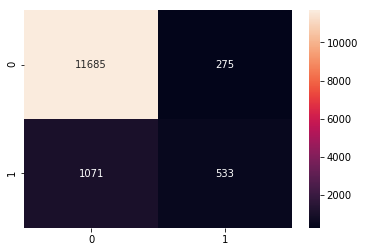

In [409]:
cm_df = pd.DataFrame(cm,index=np.unique(y_test), columns=np.unique(y_test))
cm_df['index'] = 'Actual'
cm_df['columns'] = 'Predicted'
sns.heatmap(cm,annot=True,fmt='g')

In [ ]:
plt.legend({'KNN 'r','Dt':'b'}) 
model_predicted